In [139]:
import importlib

import app.train, app.model
importlib.reload(app.train)
importlib.reload(app.model)
from app.train import *
from app.model import *

In [5]:
filename = 'data/tmp/content/log/lightning_logs/version_6/checkpoints/epoch=199-step=120599.ckpt'
litmodel = LitModel.load_from_checkpoint(filename)

In [14]:
data_dir = 'data/train'
dataset = Dataset(data_dir)

In [148]:
pl.seed_everything(0x12345678)
augment = make_augmentation()

Global seed set to 305419896


data/train/bB--cburnett-ex000.png


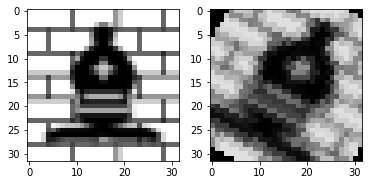

In [167]:
#
# Augmentation image
#

fig, axes = plt.subplots(1, 2)
x, y = dataset[0]
z = augment(x)

print(dataset.files[0])
imshow(x, axes[0])
imshow(z, axes[1])

In [63]:
#
# Find incorrect predictions
#

from tqdm import tqdm

litmodel.eval()
ls = []
for (x, y), f in tqdm(zip(iter(dataset), dataset.files), total=len(dataset)):
    prob, pred = to_prob_pred(litmodel.forward(x.unsqueeze(0)))
    prob, pred = prob[0], pred[0]
    if y != pred:
        ls.append((f, x, LABELS[y], LABELS[pred], prob.detach()))
        
len(ls)

100%|██████████| 10142/10142 [00:15<00:00, 649.39it/s]


7

data/train/bN--ex08005.png bN bB tensor(1.0000)
data/train/bP--ex13890.png bP bB tensor(1.0000)
data/train/empty--ex000-ex003.png empty wR tensor(0.6109)
data/train/empty--ex000-ex004.png empty wR tensor(0.5810)
data/train/empty--ex000-ex007.png empty wK tensor(0.3556)
data/train/empty--ex000-ex011.png empty bR tensor(0.1740)
data/train/empty--ex000-ex050.png empty bR tensor(0.1376)


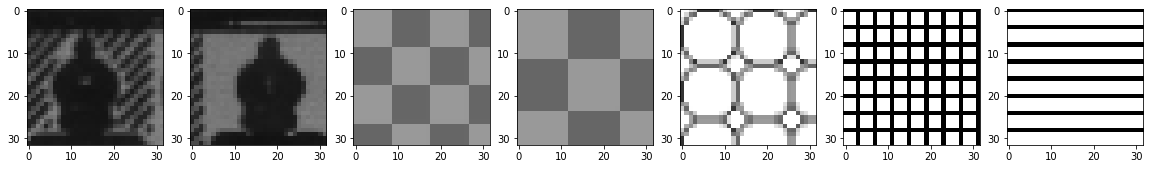

In [66]:
fig, axes = plt.subplots(1, len(ls), figsize=(20, 5))
for (f, x, y, pred, prob), ax in zip(ls, axes):
    print(f, y, pred, prob)
    imshow(x, ax)

In [87]:
filename = 'data/example/ex004--board.png'
image = Image.open(filename)
prob, pred = predict_8x8(litmodel.forward, image)
prob, pred, to_fen(pred)

(tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9998, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]]),
 tensor([[12, 12, 12, 12,  9, 12, 11, 12],
         [12,  8,  9, 12, 12,  6, 12, 12],
         [ 6, 12, 12, 12, 12,  7,  6,  0],
         [12,  6, 12, 12,  6, 12,  1, 12],
         [12, 12, 12,  1,  0, 12, 12,  3],
         [ 0, 12, 12,  0, 12, 12, 12, 12],
         [12,  0, 12, 12, 12, 12, 12,  0],
         [12,  5, 12,  3, 12, 12, 12, 12]]),
 '4r1k1/1br2p2/p4npP/1p2p1N1/3NP2R/P2P4/1P5P/1K1R4')

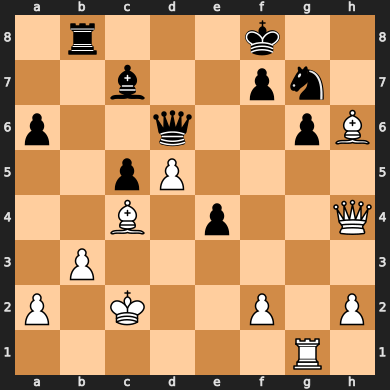

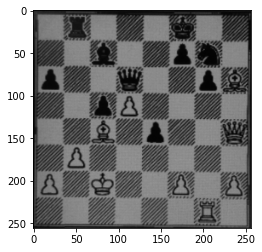

In [83]:
import chess

filename = 'data/example/ex006--board.png'
image = Image.open(filename)
imshow(image)
chess.Board(predict_fen(litmodel.forward, image))